## CP6: Maximum Likelihood fitting

In [51]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit

In [52]:
# load in data from first file
x = np.loadtxt('datafile-exp.txt')
# told data was cutoff up to 10 microseconds so range is used for normalisation later
xmin = 0.
xmax = 10.

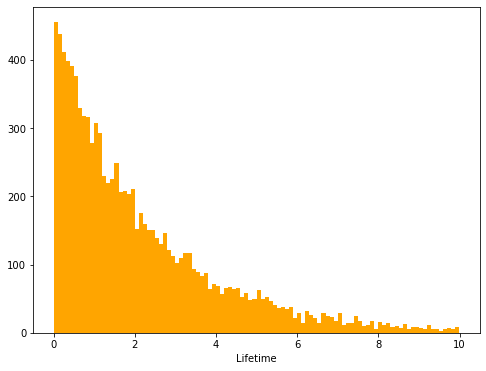

In [53]:
# plot hitogram of raw data
plt.figure(figsize=(8,6))
plt.hist(x , bins=100, color='orange')
plt.xlabel('Lifetime')
plt.show()

Looks like an exponential distribution as expected.

In [54]:
def func_exp(x, tau):
    # evaluates normalised exponential function for given tau using analytical expression from notes
    norm = tau * (np.exp(-xmin/tau) - np.exp(-xmax/tau))
    pdf = (1./norm) * np.exp(-x/tau)
    return pdf

In [55]:
def nll_exp(tau):
    # returns negative log likelihood (nll) for exponential model for fit parameter tau
    # minimising nll is prefered over equivalently maximising joint likelihood because sum is more stable than product Minuit is a minimiser
    # get pdf for curent tau
    pdf = func_exp(x, tau)
    nll = -1 * np.sum(np.log(pdf))
    return nll

In [56]:
# use Minuit to minimise nll with initial guess for tau
m1 = Minuit(nll_exp, tau=2.0)
# error defintion for nll is up to next contour +0.5 from best param values
m1.errordef = 0.5
# carry out minimisation and display full results
m1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.731e+04                  │              Nfcn = 19               │
│ EDM = 1.01e-07 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ tau  │   2.204   │   0.025   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬──────────┐
│     │      tau │
├─────┼──────────┤
│ tau │ 0.000627 │
└─────┴──────────┘

Important conclusions from printout:
- All green so fit was successful
- Best estimate for tau ('Value') was about 2.2 as expected (2.204 this time)
- Error on best estimate ('Hesse Error') was about 0.025

In [57]:
# load second dataset
t = np.loadtxt('datafile-expresonance.txt')
tmin = 0.
tmax = 10.

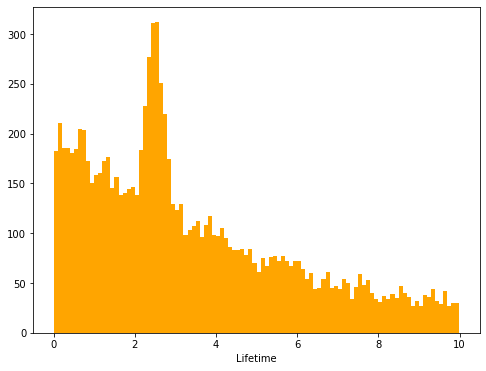

In [58]:
# plot histogram of second dataset
plt.figure(figsize=(8,6))
plt.hist(t , bins=100, color='orange')
plt.xlabel('Lifetime')
plt.show()

Looks like exponential background with Gaussian signal centred on a lifetime of ~2.5 as expected.

In [59]:
def func_full(t, lifetime, mean, F):
    # evaluates sum of normalsied exponential background and Gaussian signal
    gaussian = np.exp(-0.5 * ((t - mean)/sigma)**2)
    # fixing sigma to a small enough value such as 0.2 means it tails off to zero well within the range of interest
    # so we can safely approximate our normalisation to the normalisation between +/- infinity
    gaussian_norm = sigma*np.sqrt(2*np.pi)
    gaussian = gaussian / gaussian_norm
    
    # exponential normalised same as before
    expon = np.exp(-t/lifetime)
    expon_norm = lifetime * (np.exp(-tmin/lifetime) - np.exp(-tmax/lifetime))
    expon = expon / expon_norm
    
    # expecting F between 0 and 1 means summing like this preserves normalisation after summing
    return (1-F)*gaussian + F*expon 

In [60]:
def nll_full(lifetime, mean, F):
    # nll for exponential background and Gaussian signal model for fit parameters background 'lifetime', gaussian mean and background fraction F
    pdf = func_full(t, lifetime, mean, F)
    nll = -1 * np.sum(np.log(pdf))
    return nll

In [61]:
# fix sigma to 0.2 as recommended in notes
sigma = 0.2
# fit with second model Minuit also, with initial guesses for background lifetime, signal mean and background fraction F
m2 = Minuit(nll_full, lifetime=4., mean=3., F=0.8)
m2.errordef = 0.5
m2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.102e+04                  │              Nfcn = 84               │
│ EDM = 1.07e-05 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ lifetime │   5.04    │   0.10    │            │            │         │         │       │
│ 1 │ mean     │   2.500   │   0.012   │            │            │         │         │       │
│ 2 │ F        │   0.903   │   0.005   │            │            │         │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────────────┐
│          │  lifetime      mean         F │
├──────────┼───────────────────────────────┤
│ lifetime │    0.0105 -4.19e-05 -4.49e-05 │
│     mean │ -4.19e-05  0.000139  8.51e-07 │
│        F │ -4.49e-05  8.51e-07  2.03e-05 │
└──────────┴───────────────────────────────┘

Parameter best estimates:
- Best estimate for background lifetime was about 5 (5.04 this time) as expected
- Best estimate for signal mean was about 2.5 (2.500 this time) as expected
- Best estimate for background fraction F was about 0.9 (0.903 this time) as expected

Parameter errors:
- Error on background lifetime was 0.10
- Error on signal mean was 0.012
- Error on background fraction F was 0.005

In [62]:
m2.covariance.correlation() 

,lifetime,mean,F
lifetime,1,-0.0346,-0.0969
mean,-0.0346,1,0.016
F,-0.0969,0.016,1


By default migrad() displays the covariance matrix but above is the correlation matrix mentioned in the notes. The only somewhat significant correlation is between background lifetime and background fraction F which is about -0.1.